<a href="https://colab.research.google.com/github/perpendicooler/SMV/blob/main/SMV_XGBOOSTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost


First few rows of the dataset:
    GG                   Operation Operation Position Operation Description  \
0  7GG  INTERLOCK (POINT TO POINT)         FRONT PART              Shoulder   
1  7GG  INTERLOCK (POINT TO POINT)             SLEEVE                Sleeve   
2  7GG  INTERLOCK (POINT TO POINT)  FRONT & BACK PART              Shoulder   
3  7GG  INTERLOCK (POINT TO POINT)             SLEEVE                Sleeve   
4  7GG  INTERLOCK (POINT TO POINT)         FRONT PART              Shoulder   

                          Yarn Type Knit Construction  MC Speed  Length (cm)  \
0  73% Acrylic+24% Nylon+3% Spandex            Jersey         7         30.0   
1  73% Acrylic+24% Nylon+3% Spandex            Jersey         7         25.0   
2       60% COTTON+40% Acrylic 2/16            Jersey         6         64.0   
3       60% COTTON+40% Acrylic 2/16            Jersey         6         36.0   
4           100% COTTON 2/20, 3 PLY            Jersey         6         32.0   

    SMV  
0  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

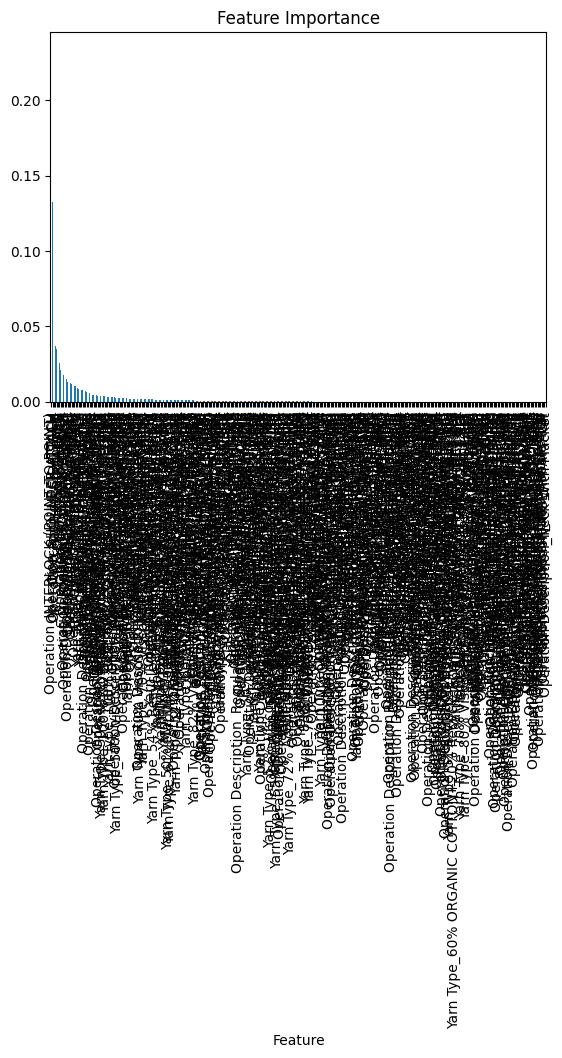


Residual Analysis:
Mean Residual: 0.050965021812185936
Max Residual: 3.71092041015625
Min Residual: -2.728393936157227


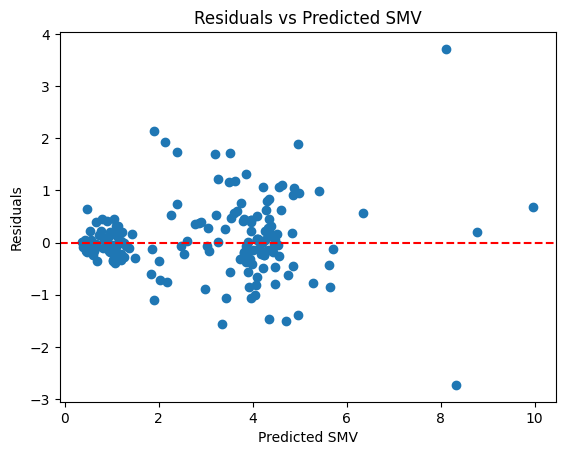

In [ ]:
# -*- coding: utf-8 -*-
"""SMV_revised_with_XGBoost.ipynb
Did we take 6 categorical and 2 numerical as features??

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/16xQedji8MDaqoDwE6RlCqqdxql4oAKSX

#1. Introduction
### In this notebook, we aim to predict SMV (Standard Minute Value) using an XGBoost model. We will load the dataset, clean the data, encode categorical variables, train the model, evaluate its performance, and analyze feature importance and residuals.

#2. Data Loading
### First, we load the dataset and preview the first few rows to understand its structure. We are using the pandas library to read the Excel file.
"""

# Load the dataset
import pandas as pd

data = pd.read_excel('/content/SMV-12&7GG.xlsx')  # Load dataset
print("First few rows of the dataset:")
print(data.head())  # Display the first few rows

"""#3. Data Cleaning
### The dataset might contain non-numeric or missing values (represented by '-'). We'll clean the data by replacing these non-numeric entries with NaN and filling missing values with 0.
"""

# Data Cleaning: Handle non-numeric entries in the dataset
data.replace('-', pd.NA, inplace=True)  # Replace '-' with NaN
data.fillna(0, inplace=True)  # Fill NaN values with 0
print("\nDataset after cleaning:")
print(data.info())  # Check the dataset after cleaning

"""#4. Encoding Categorical Variables
### Machine learning models require numerical input. We use one-hot encoding to convert categorical variables (like 'Operation', 'Yarn Type', etc.) into numeric form.
"""

# Encode Categorical Variables using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['Operation', 'Operation Position',
                                             'Yarn Type', 'GG',
                                             'Operation Description', 'Knit Construction'])
print("\nFirst few rows after encoding categorical variables:")
print(data_encoded.head())  # Display first few rows of the encoded data

"""#5. Splitting the Data into Features and Target
### Next, we split the dataset into features (X) and the target variable (y). The target variable here is SMV, which we want to predict.
"""

# Prepare Feature Matrix (X) and Target Variable (y)
X = data_encoded.drop('SMV', axis=1)  # Features (everything except SMV)
y = data_encoded['SMV']  # Target (SMV)

"""#6. Train-Test Split
### We divide the data into training and testing sets. Typically, 80% of the data is used for training, and 20% is used for testing to evaluate the model’s performance.
"""

# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets.")

"""#7. Training the XGBoost Model
### Now that our data is ready, we train an XGBoost model. This model will learn the relationship between the features and the target variable (SMV).
"""

# Train an XGBoost Model
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)  # Train the model
print("\nXGBoost Model trained.")

"""#8. Saving the Trained Model
### We save the trained model to a file so it can be loaded and used later without retraining.
"""

# Save the Trained Model for Later Use
import joblib

joblib.dump(model, 'trained_model_xgboost.pkl')  # Save the model to a file
print("\nTrained model saved.")

"""#9. Making Predictions on the Test Set
### After training, we make predictions on the test data (X_test) and compare them with the actual values (y_test).
"""

# Make Predictions on the Test Set
y_pred = model.predict(X_test)  # Predictions on the test set

"""#10. Model Evaluation
### We evaluate the performance of the model using metrics like Mean Squared Error (MSE) and R-squared (R²). These metrics help us understand how well the model is performing.
"""

# Evaluate Model Performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

"""#11. Saving Predictions to an Excel File
### We save the test data along with the actual and predicted SMV values to an Excel file for easy access and further analysis.
"""

# Save Predictions to an Excel File
X_test_with_categories = X_test.copy()  # Copy test features
X_test_with_categories['Actual SMV'] = y_test  # Add actual SMV
X_test_with_categories['Predicted SMV'] = y_pred  # Add predicted SMV

X_test_with_categories.to_excel('SMV_predictions_with_categories_xgboost.xlsx', index=False)  # Save to Excel
print("\nPredictions saved to 'SMV_predictions_with_categories_xgboost.xlsx'.")

# Download the Excel file (useful for Google Colab)
from google.colab import files
files.download('SMV_predictions_with_categories_xgboost.xlsx')

"""#12. Feature Importance Analysis
### XGBoost provides a measure of feature importance, helping us understand which features had the most impact on the model’s predictions.
"""

# Feature Importance Analysis
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.show()

"""#13. Residual Analysis
### We analyze the residuals (difference between the actual and predicted values) to assess the model’s errors.
"""

# Residual Analysis
residuals = y_test - y_pred
print(f"\nResidual Analysis:")
print(f"Mean Residual: {np.mean(residuals)}")
print(f"Max Residual: {np.max(residuals)}")
print(f"Min Residual: {np.min(residuals)}")

# Plot Residuals vs Predicted SMV
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SMV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SMV')
plt.show()


In [ ]:
pip install xgboost scikit-learn matplotlib


Model Performance:
Mean Absolute Error (MAE): 0.43078347842304077
Mean Squared Error (MSE): 0.4525806643308861
Root Mean Squared Error (RMSE): 0.6727411570068283
R-squared (R²): 0.8922819985958736


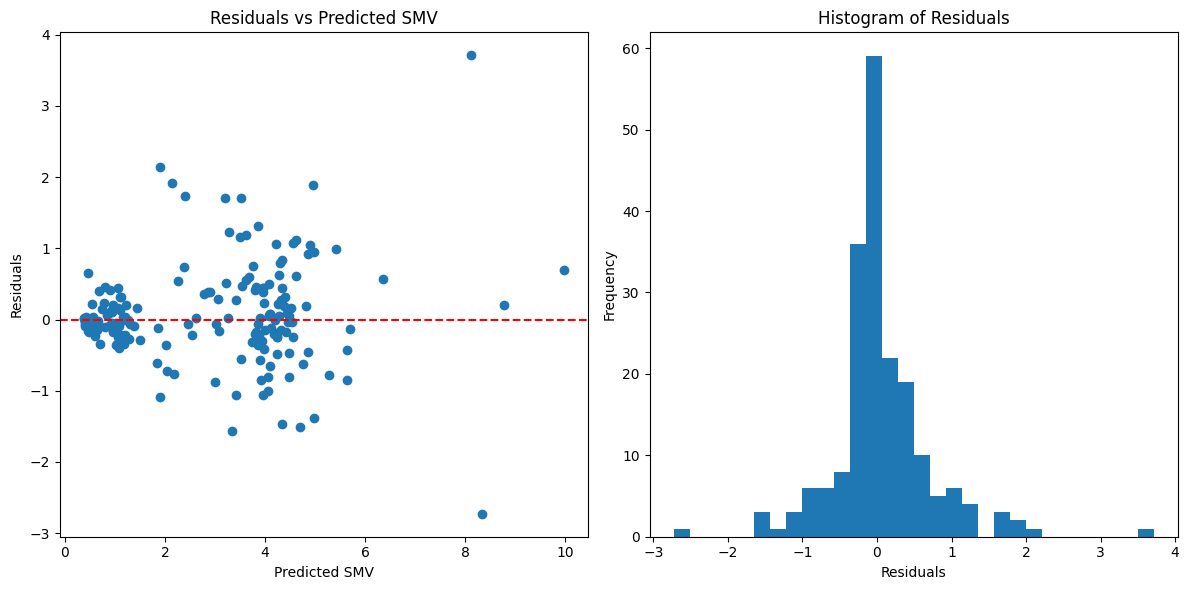

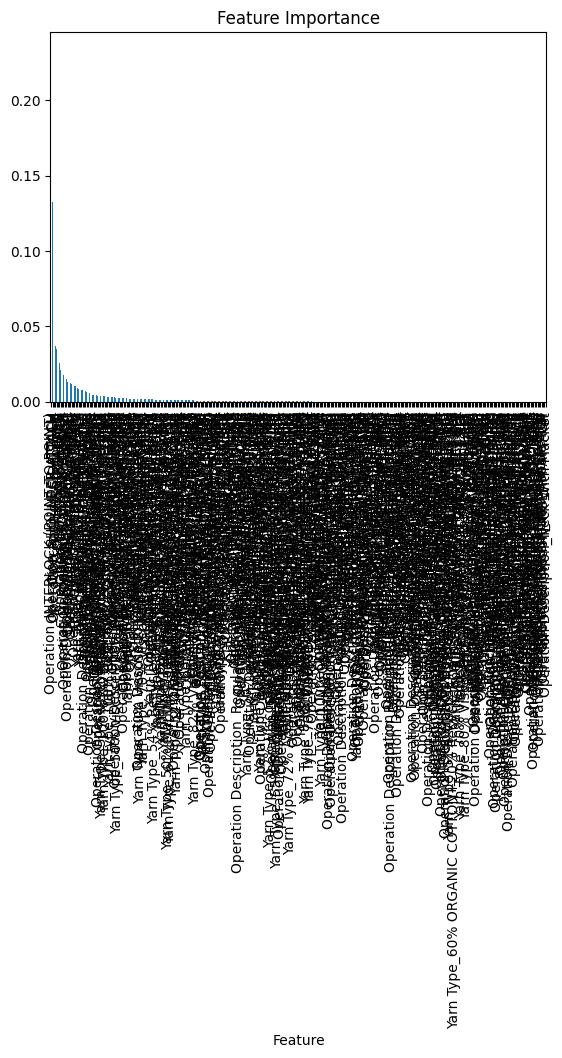


Cross-Validation R² Scores: [0.42895456 0.56312529 0.70052408 0.88439637 0.54959833]
Mean R² from Cross-Validation: 0.6253197268228701


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/SMV-12&7GG.xlsx')

# Data Cleaning
data.replace('-', pd.NA, inplace=True)
data.fillna(0, inplace=True)

# Encode Categorical Variables
data_encoded = pd.get_dummies(data, columns=['Operation', 'Operation Position',
                                             'Yarn Type', 'GG',
                                             'Operation Description', 'Knit Construction'])

# Prepare Feature Matrix (X) and Target Variable (y)
X = data_encoded.drop('SMV', axis=1)
y = data_encoded['SMV']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Performance Metrics
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))

# Plotting Residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SMV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SMV')

# Histogram of Residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\nCross-Validation R² Scores: {cv_scores}")
print(f"Mean R² from Cross-Validation: {np.mean(cv_scores)}")


First few rows of the dataset:
    GG                   Operation Operation Position Operation Description  \
0  7GG  INTERLOCK (POINT TO POINT)         FRONT PART              Shoulder   
1  7GG  INTERLOCK (POINT TO POINT)             SLEEVE                Sleeve   
2  7GG  INTERLOCK (POINT TO POINT)  FRONT & BACK PART              Shoulder   
3  7GG  INTERLOCK (POINT TO POINT)             SLEEVE                Sleeve   
4  7GG  INTERLOCK (POINT TO POINT)         FRONT PART              Shoulder   

                          Yarn Type Knit Construction  MC Speed  Length (cm)  \
0  73% Acrylic+24% Nylon+3% Spandex            Jersey         7         30.0   
1  73% Acrylic+24% Nylon+3% Spandex            Jersey         7         25.0   
2       60% COTTON+40% Acrylic 2/16            Jersey         6         64.0   
3       60% COTTON+40% Acrylic 2/16            Jersey         6         36.0   
4           100% COTTON 2/20, 3 PLY            Jersey         6         32.0   

    SMV  
0  

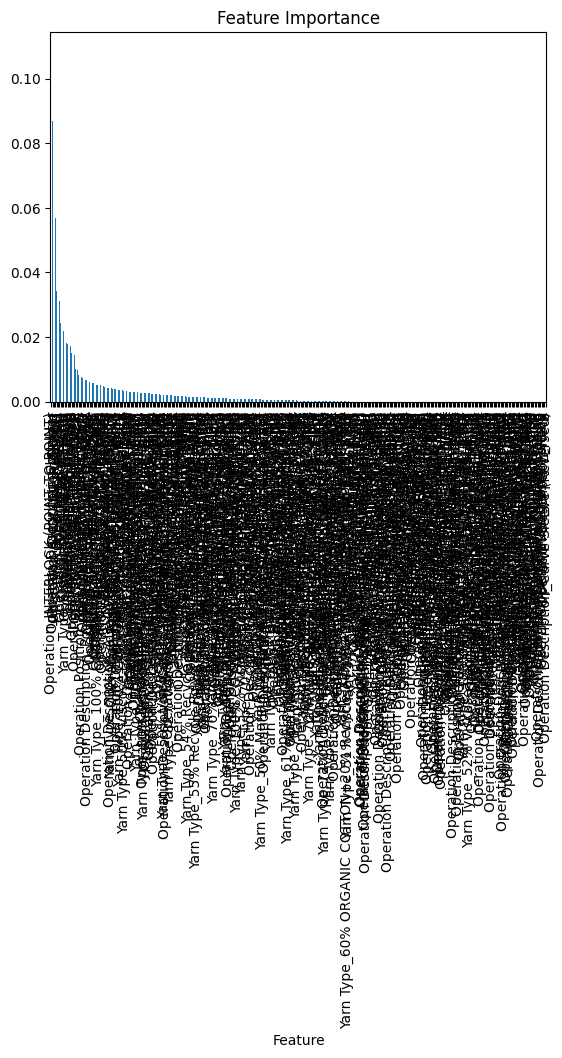


Residual Analysis:
Mean Residual: 0.03139454176839516
Max Residual: 4.302426414489746
Min Residual: -2.4886964797973636


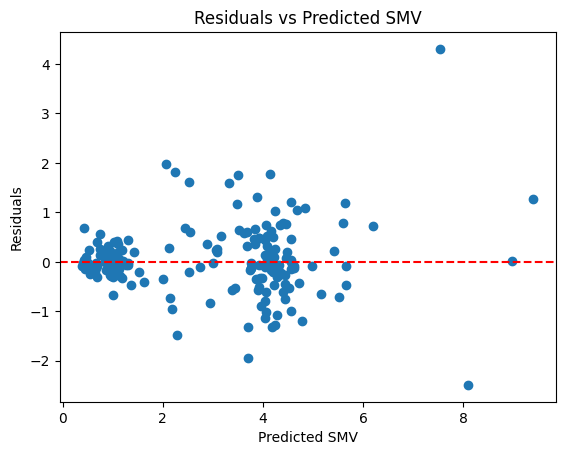

In [ ]:
# -*- coding: utf-8 -*-
"""SMV_revised_with_XGBoost.ipynb
In this notebook, we aim to predict SMV (Standard Minute Value) using an XGBoost model with hyperparameter tuning.
"""

# 1. Introduction
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import joblib

# 2. Data Loading
data = pd.read_excel('/content/SMV-12&7GG.xlsx')  # Load dataset
print("First few rows of the dataset:")
print(data.head())  # Display the first few rows

# 3. Data Cleaning
data.replace('-', pd.NA, inplace=True)  # Replace '-' with NaN
data.fillna(0, inplace=True)  # Fill NaN values with 0
print("\nDataset after cleaning:")
print(data.info())  # Check the dataset after cleaning

# 4. Encoding Categorical Variables
data_encoded = pd.get_dummies(data, columns=['Operation', 'Operation Position',
                                             'Yarn Type', 'GG',
                                             'Operation Description', 'Knit Construction'])
print("\nFirst few rows after encoding categorical variables:")
print(data_encoded.head())  # Display first few rows of the encoded data

# 5. Splitting the Data into Features and Target
X = data_encoded.drop('SMV', axis=1)  # Features (everything except SMV)
y = data_encoded['SMV']  # Target (SMV)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets.")

# 7. Hyperparameter Tuning with Grid Search
# Define the model
model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R² score from Grid Search:", grid_search.best_score_)

# 8. Training the XGBoost Model
best_model = grid_search.best_estimator_  # Use the best model from Grid Search
best_model.fit(X_train, y_train)  # Train the model
print("\nXGBoost Model trained.")

# 9. Saving the Trained Model
joblib.dump(best_model, 'trained_xgboost_model.pkl')  # Save the model to a file
print("\nTrained model saved.")

# 10. Making Predictions on the Test Set
y_pred = best_model.predict(X_test)  # Predictions on the test set

# 11. Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# 12. Saving Predictions to an Excel File
X_test_with_categories = X_test.copy()  # Copy test features
X_test_with_categories['Actual SMV'] = y_test  # Add actual SMV
X_test_with_categories['Predicted SMV'] = y_pred  # Add predicted SMV

X_test_with_categories.to_excel('SMV_predictions_with_categories.xlsx', index=False)  # Save to Excel
print("\nPredictions saved to 'SMV_predictions_with_categories.xlsx'.")

# 13. Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.show()

# 14. Residual Analysis
residuals = y_test - y_pred
print(f"\nResidual Analysis:")
print(f"Mean Residual: {np.mean(residuals)}")
print(f"Max Residual: {np.max(residuals)}")
print(f"Min Residual: {np.min(residuals)}")

# Plot Residuals vs Predicted SMV
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SMV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SMV')
plt.show()
